## MMseqs Viterbi Filter

### MMseqs Dataset

In [8]:
#imports
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

matplotlib.rcParams['figure.dpi'] = 300
pd.set_option('display.max_columns', None)  

In [9]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)


In [10]:
# pyplot functions
def on_mouse_move(event):
    print('Event received:',event.x,event.y)

In [11]:
# bench directory
bench_dir = os.getcwd()

In [12]:
# data filepaths
data_path = "{}/data/results_7_75.10.tflist".format(bench_dir)

In [13]:
# header and datatype
header = {
    "e_val": "float64",
    "truth": "str",
    "t_cnt": "int64",
    "f_cnt": "int64"
}
keys = header.keys()

In [14]:
# load data
names=keys
sep=" "
data = pd.read_csv(data_path, sep=sep, names=names, header=None)
data

,e_val,truth,t_cnt,f_cnt
0,2.042000e-54,T,10,0
1,3.545000e-42,T,20,0
2,8.805000e-37,?,28,0
3,4.764000e-33,T,37,0
4,2.067000e-31,T,47,0
...,...,...,...,...
4176409,1.475000e+07,F,4717,39383679
4176410,1.479000e+07,?,4717,39383685
4176411,1.805000e+07,F,4717,39383695
4176412,1.934000e+07,F,4717,39383705


In [15]:
falses = data[data.f_cnt > 0]
falses

,e_val,truth,t_cnt,f_cnt
138,9.965000e-05,T,1357,1
139,1.085000e-04,T,1367,1
140,1.196000e-04,T,1377,1
141,1.392000e-04,T,1387,1
142,1.518000e-04,T,1396,1
...,...,...,...,...
4176409,1.475000e+07,F,4717,39383679
4176410,1.479000e+07,?,4717,39383685
4176411,1.805000e+07,F,4717,39383695
4176412,1.934000e+07,F,4717,39383705


In [17]:
xmin = 1.965e-05
xmax = 3.413e7
total_true = 4717

In [16]:
# done beforehand
# # number counts
# counts = {}
# counts["T"] = 0
# counts["F"] = 0
# counts["?"] = 0
# # probability density functions (accumulative)
# pdf = {}
# pdf["T"] = []
# pdf["F"] = []
# pdf["?"] = []

# for i in data.iloc:
#     truth = row["truth"]
#     counts[truth] += 1
#     pdf["T"].append(counts["T"])
#     pdf["F"].append(counts["F"])
# #     pdf["?"].append(counts["?"])

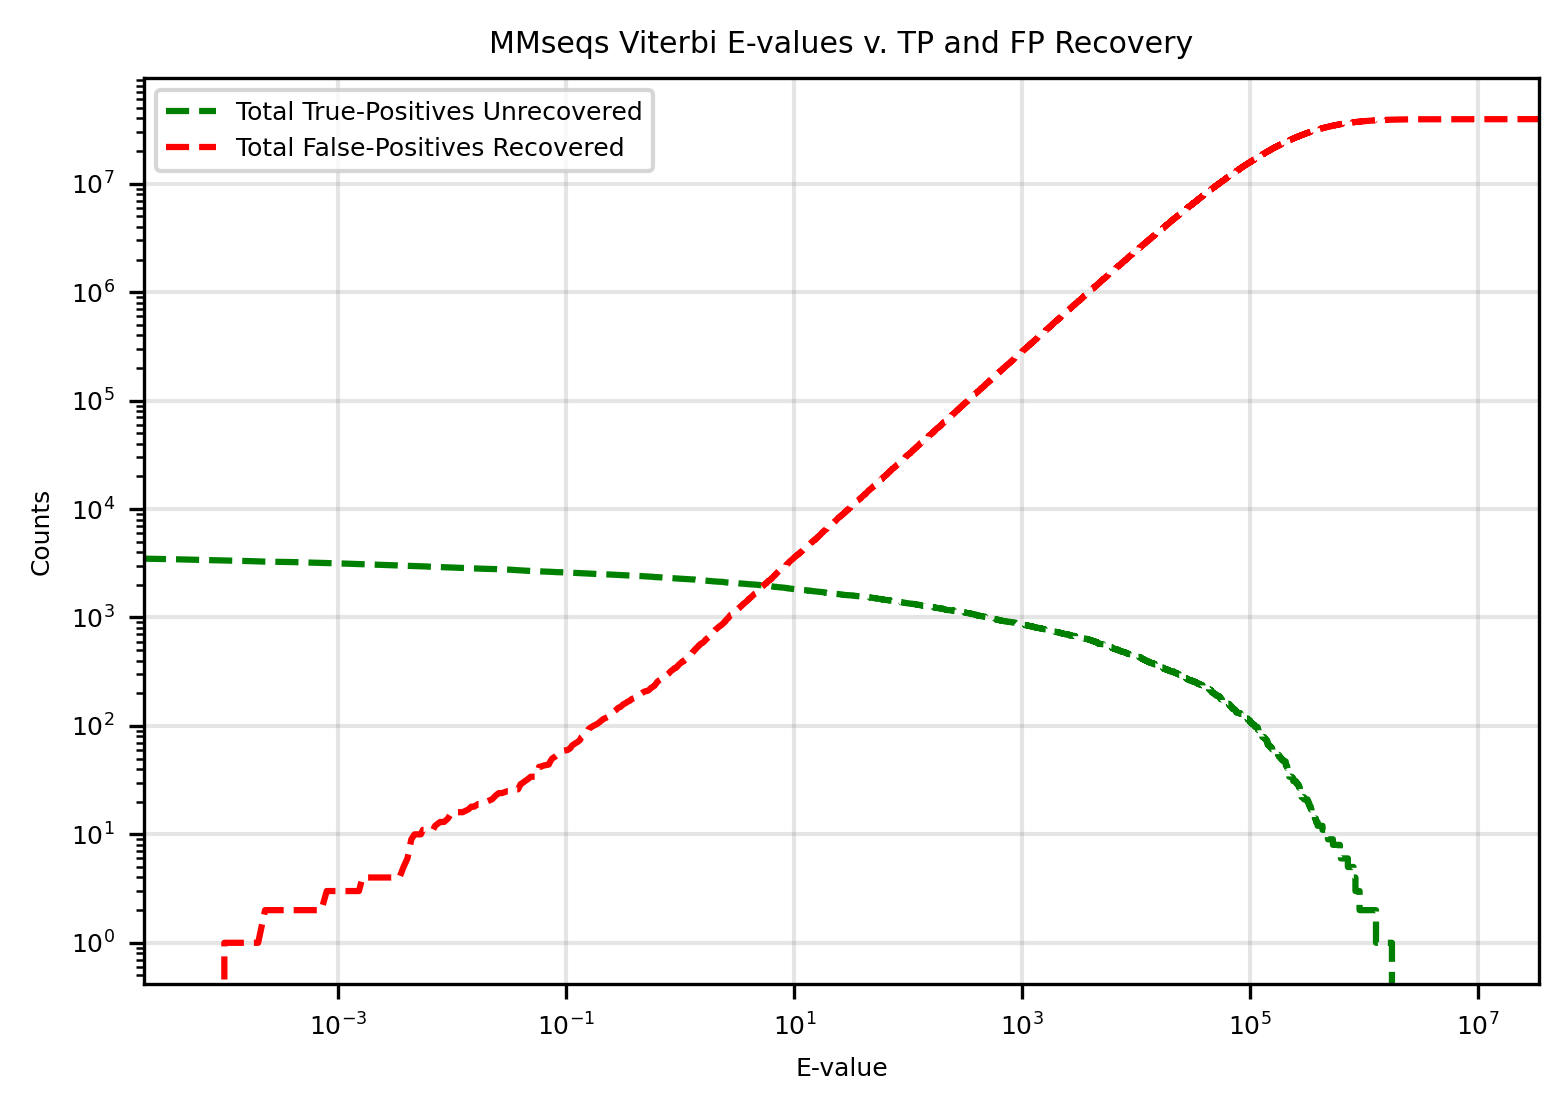

In [22]:
# plot true-positives / false-positives

colors = ['green', 'red']
labels = ['Total True-Positives Unrecovered', 'Total False-Positives Recovered']

plt.plot( data["e_val"], total_true - data["t_cnt"], color=colors[0], label=labels[0], linestyle="--", marker=None )
plt.plot( data["e_val"], data["f_cnt"], color=colors[1], label=labels[1], linestyle="--", marker=None )

plt.title('MMseqs Viterbi E-values v. TP and FP Recovery')
plt.legend(loc='upper left')
plt.xlabel('E-value')
plt.ylabel('Counts')
plt.xlim(xmin, xmax)

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

plt.xscale('log')
plt.yscale('log')

#plt.savefig("")
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


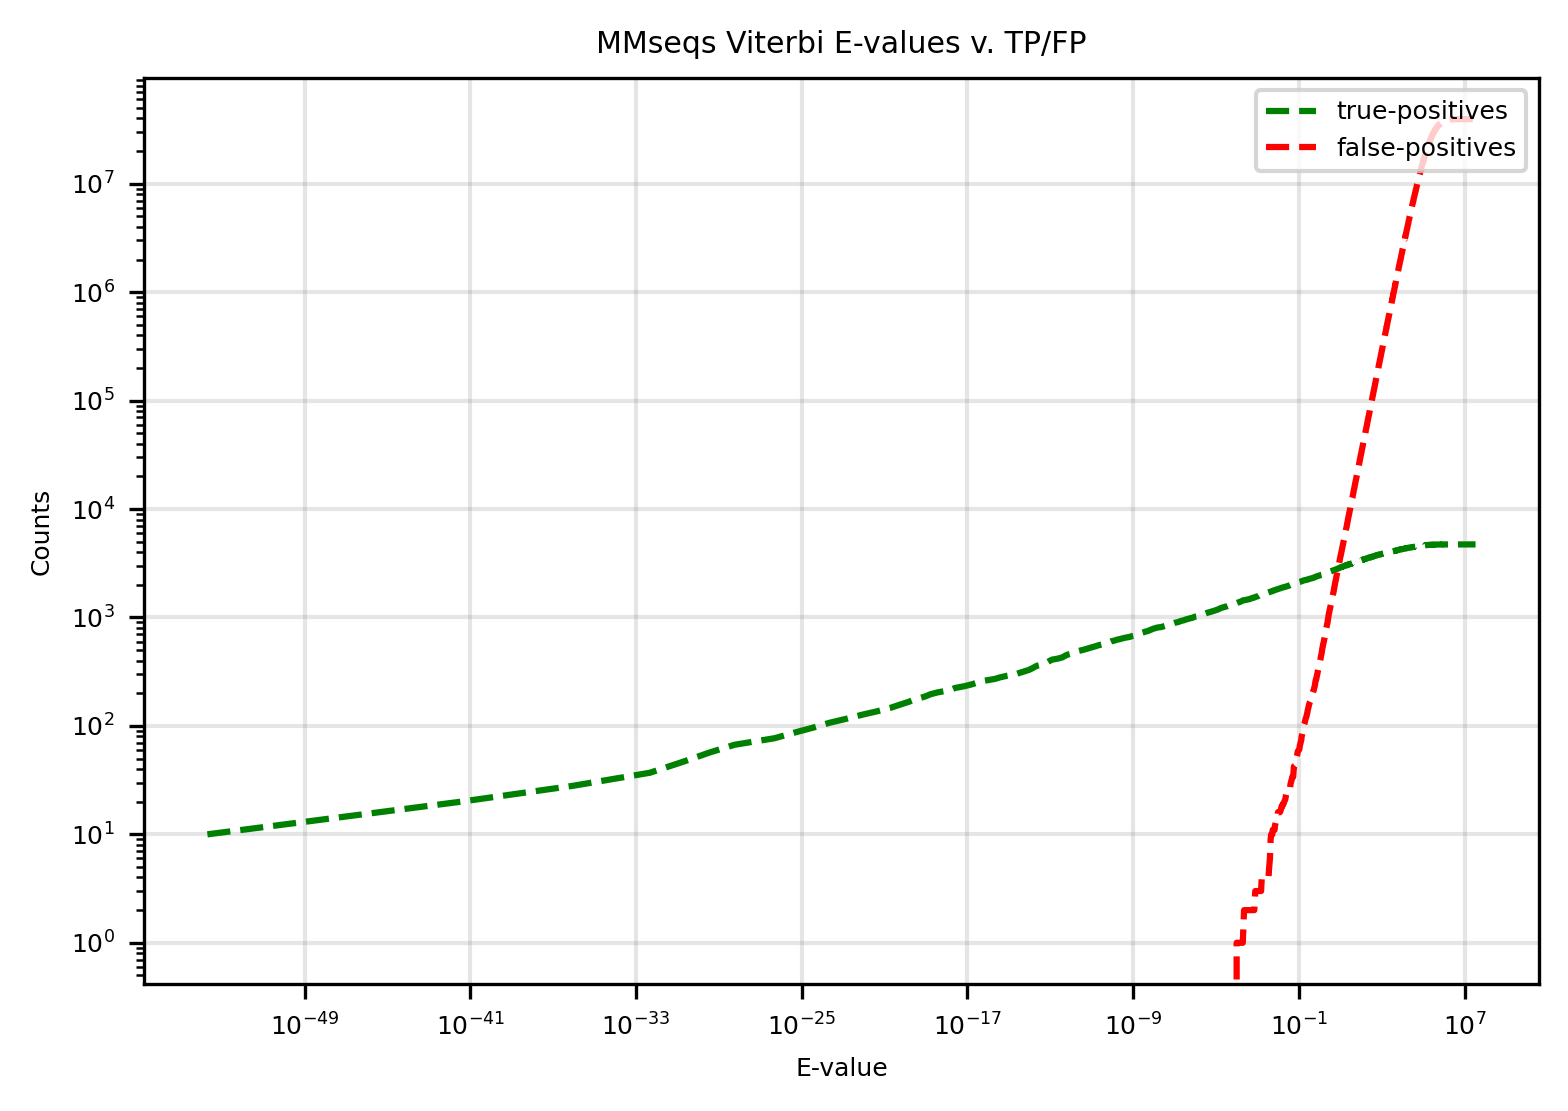

In [22]:
# plot true-positives / false-positives

colors = ['green', 'red']
labels = ['true-positives', 'false-positives']

plt.plot( data["e_val"], data["t_cnt"], color=colors[0], label=labels[0], linestyle="--", marker=None )
plt.plot( data["e_val"], data["f_cnt"], color=colors[1], label=labels[1], linestyle="--", marker=None )

plt.title('MMseqs Viterbi E-values v. TP/FP')
plt.legend(loc='upper right')
plt.xlabel('E-value')
plt.ylabel('Counts')

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

plt.xscale('log')
plt.yscale('log')

#plt.savefig("")
plt.show()

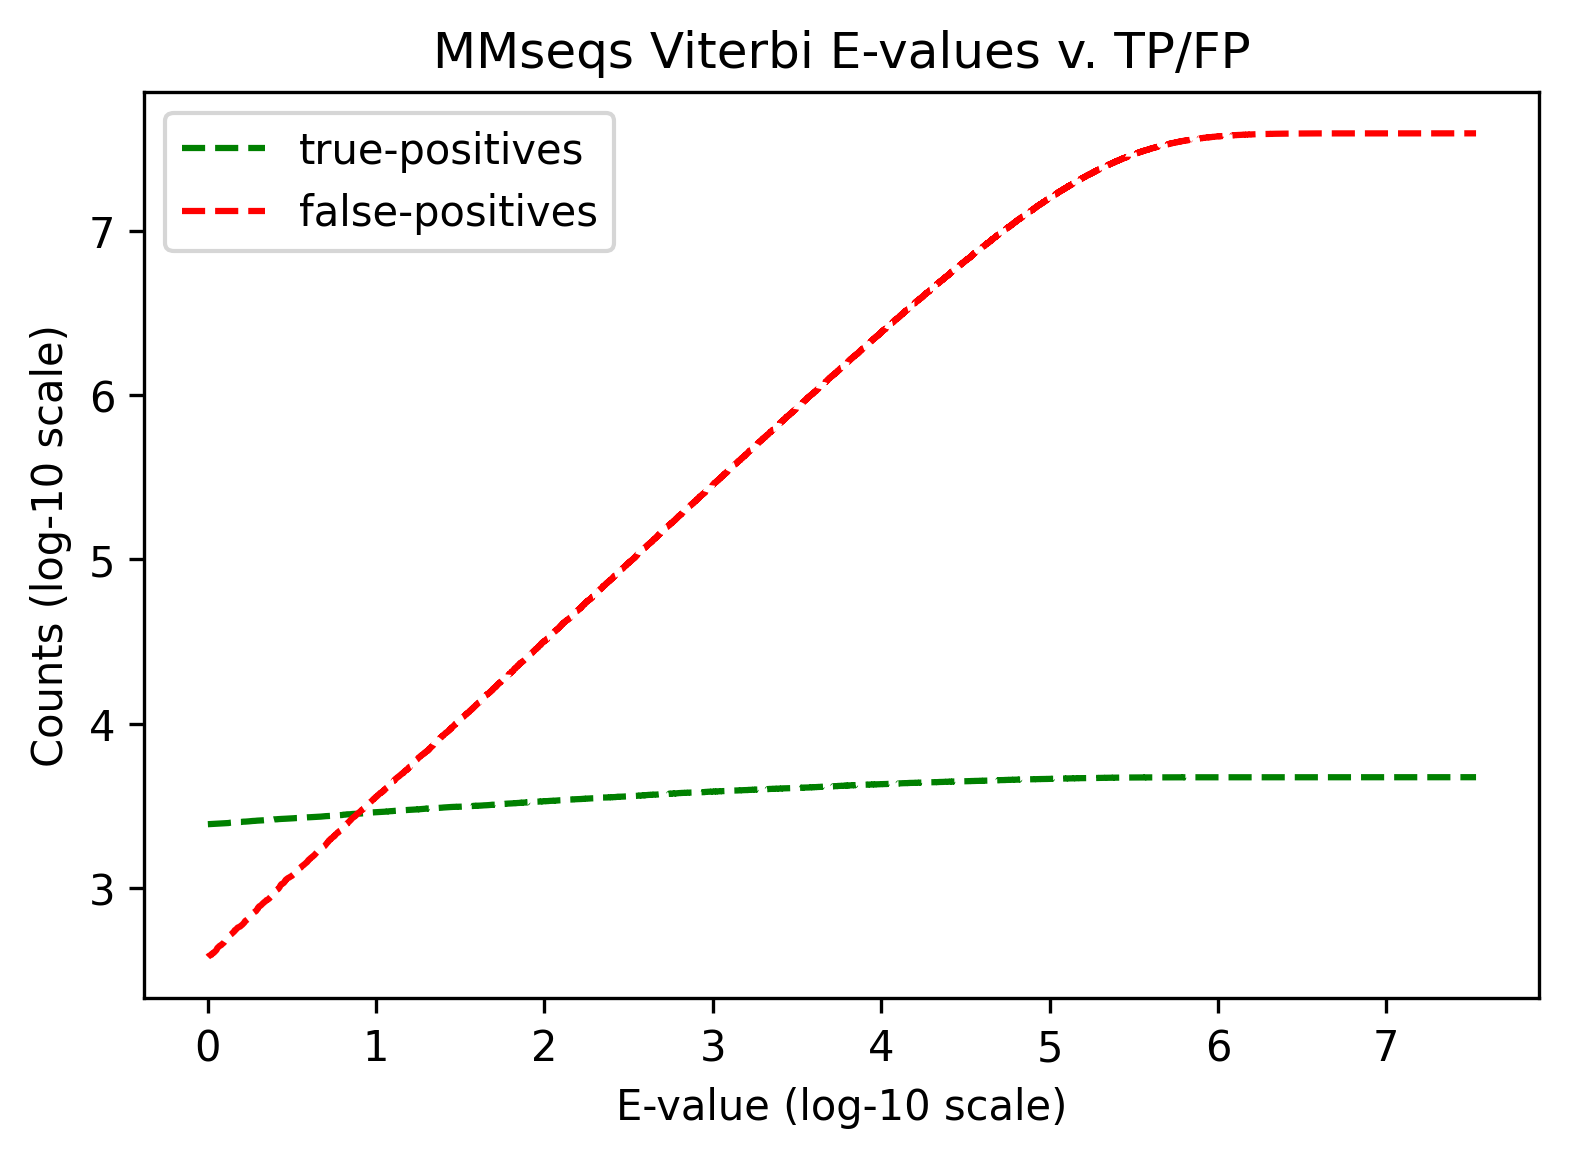

In [9]:
# plot true-positives / false-positives

colors = ['green', 'red']
labels = ['true-positives', 'false-positives']

plt.plot( np.log10(data["e_val"]), np.log10(data["t_cnt"]), color=colors[0], label=labels[0], linestyle="--", marker=None )
plt.plot( np.log10(data["e_val"]), np.log10(data["f_cnt"]), color=colors[1], label=labels[1], linestyle="--", marker=None )

plt.title('MMseqs Viterbi E-values v. TP/FP')
plt.legend(loc='upper left')
plt.xlabel('E-value (log-10 scale)')
plt.ylabel('Counts (log-10 scale)')
plt.savefig("visuals/mmseqs-viterbi-eval-v-tp-fp.jpg")
plt.show()